**Reference** -https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html


In [1]:
#Author: Mohamed Rashiq PP

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# dataset
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
# selecting some of the categories
categories = ['rec.sport.baseball', 'sci.crypt',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
print (train.data[5])

From: jmcocker@eos.ncsu.edu (Mitch)
Subject: Re: Newsgroup Split
Originator: jmcocker@c00053-100lez.eos.ncsu.edu
Reply-To: jmcocker@eos.ncsu.edu (Mitch)
Organization: North Carolina State University, Project Eos
Lines: 29


In article <FOX.93Apr22002043@graphics.nyu.edu>, fox@graphics.cs.nyu.edu (David Fox) writes:
|>
|>   Concerning the proposed newsgroup split, I personally am not in favor of
|>   doing this.  I learn an awful lot about all aspects of graphics by reading
|>   this group, from code to hardware to algorithms.  I just think making 5
|>   different groups out of this is a wate, and will only result in a few posts
|>   a week per group.  I kind of like the convenience of having one big forum
|>   for discussing all aspects of graphics.  Anyone else feel this way?
|>   Just curious.
|>
|>I disagree.  You could learn the same amount by reading all the
|>split groups, and it would make things easier for those of us
|>who are less omnivorous.  There is no "waste" in creating 

In [4]:
# TfidfVectorizer - Convert the collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

**TF-IDF**

In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.[1] It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

In [5]:
model.fit(train.data, train.target)
labels = model.predict(test.data)
labels

array([3, 3, 0, ..., 2, 1, 2])

accuracy : 0.9282994923857868
precision : 0.9354387149039842
recall : 0.9277601186033579


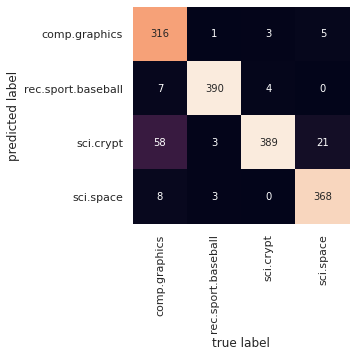

In [14]:
#metrics

from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
accuracy=accuracy_score(test.target,labels)
precision=precision_score(test.target,labels, average="macro")
recall=recall_score(test.target,labels, average="macro")
print("accuracy :",accuracy)
print("precision :",precision)
print("recall :",recall)

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('sending a payload to the ISS')

'sci.space'

In [ ]:
predict_category('He fell down while playing')

'rec.sport.baseball'